<a href="https://colab.research.google.com/github/Manan-1226/PythonPractice/blob/main/PandasAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Installing logger
!pip install loguru

In [45]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from loguru import logger

try:
    # Attempt to mount Google Drive
    drive.mount('/content/drive', force_remount=True)
    logger.info("Google Drive is mounted successfully.")
except TimeoutError:
    # Log cases where the drive.mount call times out
    logger.error("TimeoutError: Mounting Google Drive took too long to complete.")
except Exception as e:
    # Log any other exceptions that may occur
    logger.exception(f"An unexpected error occurred while mounting Google Drive: {e}")


2023-12-11 06:41:46.469 | INFO     | __main__:<cell line: 8>:11 - Google Drive is mounted successfully.


Mounted at /content/drive


Task 1: Load the Data
- Use Pandas to load the dataset into a DataFrame.
- Display the first few rows to understand the data you'll be working with.


In [47]:
# Define the path to the dataset as a constant
DATASET_PATH = '/content/drive/MyDrive/retail_sales.csv'

try:
    df = pd.read_csv(DATASET_PATH)

    # Display the first few rows
    logger.info("The first few rows of the DataFrame:\n{}", df.head())

    # Inspect data types
    logger.info("DataFrame info:\n{}", df.info())

    # For analyzing the data
    logger.info("DataFrame descriptive statistics:\n{}", df.describe())

except FileNotFoundError:
    logger.error("The file {} was not found.", DATASET_PATH)
except pd.errors.EmptyDataError:
    logger.error("The file {} is empty.", DATASET_PATH)
except pd.errors.ParserError:
    logger.error("Error parsing the file {}.", DATASET_PATH)
except Exception as e:
    logger.exception("An unexpected error occurred:")

2023-12-11 06:42:05.721 | INFO     | __main__:<cell line: 4>:8 - The first few rows of the DataFrame:
  InvoiceNo  StockCode              Description  Quantity  \
0    000001      22383  LUNCH BAG  BLACK SKULL.         1   
1    000002      20727      LUNCH BAG CARS BLUE         3   
2    000003      20726  LUNCH BAG PINK POLKADOT         3   
3    000004      20727  LUNCH BAG PINK POLKADOT         2   
4    000005      20727      LUNCH BAG CARS BLUE         5   

           InvoiceDate  UnitPrice  CustomerID      Country  
0  2020-03-26 03:11:23       5.79       12317        Spain  
1  2020-12-17 13:47:20       7.47       12329  Netherlands  
2  2020-11-26 14:29:34       4.49       12389  Switzerland  
3  2020-12-02 12:04:06       0.46       12315  Netherlands  
4  2020-10-26 01:31:29       0.43       12374      Belgium  
2023-12-11 06:42:05.740 | INFO     | __main__:<cell line: 4>:11 - DataFrame info:
None
2023-12-11 06:42:05.756 | INFO     | __main__:<cell line: 4>:14 - DataFrame de

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    5000 non-null   object 
 1   StockCode    5000 non-null   int64  
 2   Description  5000 non-null   object 
 3   Quantity     5000 non-null   int64  
 4   InvoiceDate  5000 non-null   object 
 5   UnitPrice    5000 non-null   float64
 6   CustomerID   5000 non-null   int64  
 7   Country      5000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 312.6+ KB


Task 2: Data Cleaning
- Check for and handle any missing values.
- Remove any records where the invoice is a cancellation (these start with 'C').
- Convert `InvoiceDate` to a datetime object.
- Ensure that `Quantity` and `CustomerID` are integers and `UnitPrice` is a float.



In [27]:
# Step 1: Check for missing values in the dataset
logger.info("Missing values before cleaning:")
logger.info(df.isnull().sum())

# Since CustomerID and InvoiceNo is crucial for further analysis, we'll drop rows where CustomerID or InvoiceNo is missing
# Description, StockCode and Country can potentially be kept even if missing, depending on the analysis
df.dropna(subset=['InvoiceNo', 'CustomerID'], inplace=True)

# Step 2: Remove records with cancellations (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

# Step 3: Convert 'InvoiceDate' to a datetime object
# Using errors='coerce' will convert unparseable data into NaT, which we then can drop
try:
    df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
    # After conversion, drop any rows where the datetime conversion failed (resulted in NaT)
    df.dropna(subset=['InvoiceDate'], inplace=True)
except Exception as e:
    logger.exception("An error occurred while converting 'InvoiceDate'.")

# Step 4: Ensure that 'Quantity' and 'CustomerID' are integers, and 'UnitPrice' is a float
# The use of 'downcast' in to_numeric optimizes the type by downcasting to the smallest numeric dtype possible
try:
    df.loc[:, 'Quantity'] = pd.to_numeric(df['Quantity'], errors='raise', downcast='integer')
    df.loc[:, 'UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='raise', downcast='float')
    df.loc[:, 'CustomerID'] = pd.to_numeric(df['CustomerID'], errors='raise', downcast='integer')
except ValueError as e:
    logger.error("ValueError encountered: {}", e)
except TypeError as e:
    logger.error("TypeError encountered: {}", e)
except Exception as e:
    logger.exception("An unexpected error occurred.")

MIN_QUANTITY = 1
MIN_UNITPRICE = 0

# Drop any remaining records with 'Quantity' less than MIN_QUANTITY or 'UnitPrice' less than MIN_UNITPRICE
df = df[(df['Quantity'] >= MIN_QUANTITY) & (df['UnitPrice'] >= MIN_UNITPRICE)]

# Final check for missing or invalid values after cleaning
logger.info("Missing values after cleaning:")
logger.info(df.isnull().sum())

# Final DataFrame information after cleaning
logger.info("Cleaned DataFrame information:")
df.info()



2023-12-11 05:10:38.218 | INFO     | __main__:<cell line: 2>:2 - Missing values before cleaning:
2023-12-11 05:10:38.226 | INFO     | __main__:<cell line: 3>:3 - InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
<ipython-input-27-97780ac4687e>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
2023-12-11 05:10:38.250 | INFO     | __main__:<cell line: 45>:45 - Missing values after cleaning:
2023-12-11 05:10:38.261 | INFO     | __main__:<cell line: 46>:46 - InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
d

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4901 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4901 non-null   object        
 1   StockCode    4901 non-null   int64         
 2   Description  4901 non-null   object        
 3   Quantity     4901 non-null   int8          
 4   InvoiceDate  4901 non-null   datetime64[ns]
 5   UnitPrice    4901 non-null   float32       
 6   CustomerID   4901 non-null   int16         
 7   Country      4901 non-null   object        
dtypes: datetime64[ns](1), float32(1), int16(1), int64(1), int8(1), object(3)
memory usage: 263.2+ KB


Task 3: Data Transformation
- Create a new column `TotalPrice` that represents the total amount spent per line item (Quantity * UnitPrice).
- Aggregate the data at the customer level to create the following attributes:
 - `TotalSpent`: The total amount spent by each customer.
 - `TotalItems`: The total number of items purchased by each customer.
 - `OrderCount`: The number of unique transactions (orders) made by each customer.
 - `AvgOrderValue`: The average value of the orders made by each customer (`TotalSpent` / `OrderCount`).
 - `AvgItemPrice`: The average price of the items purchased by each customer (`TotalSpent` / `TotalItems`).
- Identify the most recent purchase date of each customer and calculate the number of days since their last purchase.


In [33]:
# Initialize an empty DataFrame for the customer-centric data
customer_df = pd.DataFrame()

# Attempt to perform data transformations
try:
    # Create a new column 'TotalPrice' that represents the total amount spent per line item
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

    # Aggregate the data at the customer level to create new attributes
    customer_df = df.groupby('CustomerID').agg({
        'TotalPrice': 'sum',                     # Total amount spent by each customer
        'InvoiceNo': pd.Series.nunique,          # Number of unique transactions (orders) by each customer
        'Quantity': 'sum',                       # Total number of items purchased by each customer
        'InvoiceDate': 'max'                     # Most recent purchase date of each customer
    }).rename(columns={
        'TotalPrice': 'TotalSpent',
        'InvoiceNo': 'OrderCount',
        'Quantity': 'TotalItems',               # Corrected to sum quantities
        'InvoiceDate': 'LastPurchaseDate'
    })

    # Calculate 'AvgOrderValue' and 'AvgItemPrice' for each customer
    # Use 'TotalSpent' and 'OrderCount' to calculate 'AvgOrderValue'
    customer_df['AvgOrderValue'] = customer_df['TotalSpent'] / customer_df['OrderCount']
    # Use 'TotalSpent' and 'TotalItems' to calculate 'AvgItemPrice'
    customer_df['AvgItemPrice'] = customer_df['TotalSpent'] / customer_df['TotalItems']

    # Replace any potential 'inf' or 'NaN' values resulting from division by zero with a default value (e.g., 0)
    customer_df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

    # Calculate the number of days since the last purchase for each customer
    most_recent_date = customer_df['LastPurchaseDate'].max()
    customer_df['DaysSinceLastPurchase'] = (most_recent_date - customer_df['LastPurchaseDate']).dt.days

    # Reset index to make 'CustomerID' a column again
    customer_df.reset_index(inplace=True)

    # Log the transformed customer-centric DataFrame
    logger.info("Transformed customer-centric DataFrame:\n{}", customer_df)

except KeyError as e:
    logger.error("Column not found: {}", e)
except TypeError as e:
    logger.error("Data type error: {}", e)
except Exception as e:
    logger.exception("An unexpected error occurred: {}", e)

2023-12-11 05:46:48.260 | INFO     | __main__:<cell line: 5>:39 - Transformed customer-centric DataFrame:
    CustomerID  TotalSpent  OrderCount  TotalItems    LastPurchaseDate  \
0        12300  325.339996          50         154 2020-12-19 15:47:24   
1        12301  301.070007          55         158 2020-12-29 23:56:07   
2        12302  219.309998          44         134 2020-12-28 13:13:03   
3        12303  284.989990          51         145 2020-12-24 16:52:21   
4        12304  424.779999          54         158 2020-12-21 12:36:41   
..         ...         ...         ...         ...                 ...   
95       12395  206.770004          40         129 2020-12-29 01:59:02   
96       12396  249.910004          47         124 2020-12-17 07:15:50   
97       12397  348.850006          48         145 2020-11-18 13:35:37   
98       12398  200.160004          36         104 2020-12-26 05:04:28   
99       12399  404.510010          69         221 2020-12-26 11:15:13   

    A

Task 4: Customer Segmentation
- Segment customers into at least three groups based on their `TotalSpent` and `OrderCount`.
- Label these segments as 'High Value', 'Medium Value', and 'Low Value'.


In [49]:
# Define quantile thresholds and segment boundaries as variables
LOW_QUANTILE = 0.33
HIGH_QUANTILE = 0.66
LOW_SCORE = 1
MEDIUM_SCORE = 2
HIGH_SCORE = 3

# Define segment labels
LOW_VALUE = 'Low Value'
MEDIUM_VALUE = 'Medium Value'
HIGH_VALUE = 'High Value'

try:
    # Define thresholds for segmentation based on quantiles for TotalSpent and OrderCount
    spend_quantiles = customer_df['TotalSpent'].quantile([LOW_QUANTILE, HIGH_QUANTILE])
    order_quantiles = customer_df['OrderCount'].quantile([LOW_QUANTILE, HIGH_QUANTILE])

    # Function to assign scores based on quantiles
    def get_score(value, quantiles):
        """
        Assigns a score to a value based on defined quantiles.

        Parameters:
        value (float): The value to be scored.
        quantiles (pd.Series): A Series containing quantile thresholds.

        Returns:
        int: A score representing the quantile bucket for the value.
        """
        if value <= quantiles[LOW_QUANTILE]:
            return LOW_SCORE
        elif value <= quantiles[HIGH_QUANTILE]:
            return MEDIUM_SCORE
        else:
            return HIGH_SCORE

    # Apply the functions to assign scores to each customer
    customer_df['SpendScore'] = customer_df['TotalSpent'].apply(get_score, quantiles=spend_quantiles)
    customer_df['OrderScore'] = customer_df['OrderCount'].apply(get_score, quantiles=order_quantiles)

    # Combine the scores to create a combined score
    customer_df['CombinedScore'] = customer_df['SpendScore'] + customer_df['OrderScore']

    # Define segment labels based on combined score
    segment_labels = {
        LOW_SCORE+LOW_SCORE: LOW_VALUE,       # Combined score of 2 (1+1)
        LOW_SCORE+MEDIUM_SCORE: LOW_VALUE,       # Combined score of 3 (1+2 or 2+1)
        MEDIUM_SCORE+MEDIUM_SCORE: MEDIUM_VALUE,    # Combined score of 4 (2+2)
        MEDIUM_SCORE+HIGH_SCORE: MEDIUM_VALUE,    # Combined score of 5 (2+3 or 3+2)
        HIGH_SCORE+HIGH_SCORE: HIGH_VALUE       # Combined score of 6 (3+3)
    }
    customer_df['Segment'] = customer_df['CombinedScore'].map(segment_labels)

except KeyError as e:
    logger.error(f"Column not found: {e}")
except Exception as e:
    logger.exception(f"An unexpected error occurred: {e}")

# Display the first few rows of the segmented customer DataFrame
customer_df[['CustomerID', 'TotalSpent', 'OrderCount', 'Segment']].head()


,CustomerID,TotalSpent,OrderCount,Segment
0,12300,325.339996,50,Medium Value
1,12301,301.070007,55,Medium Value
2,12302,219.309998,44,Low Value
3,12303,284.989990,51,Medium Value
4,12304,424.779999,54,High Value


Task 5: Visualization and Interpretation
- Create a scatter plot to visualize the customer segments based on `TotalSpent` and `OrderCount`.
- Create a histogram for each segment to show the distribution of `DaysSinceLastPurchase`.
- Analyze the segments and provide insights into the purchasing behavior of the different segments.


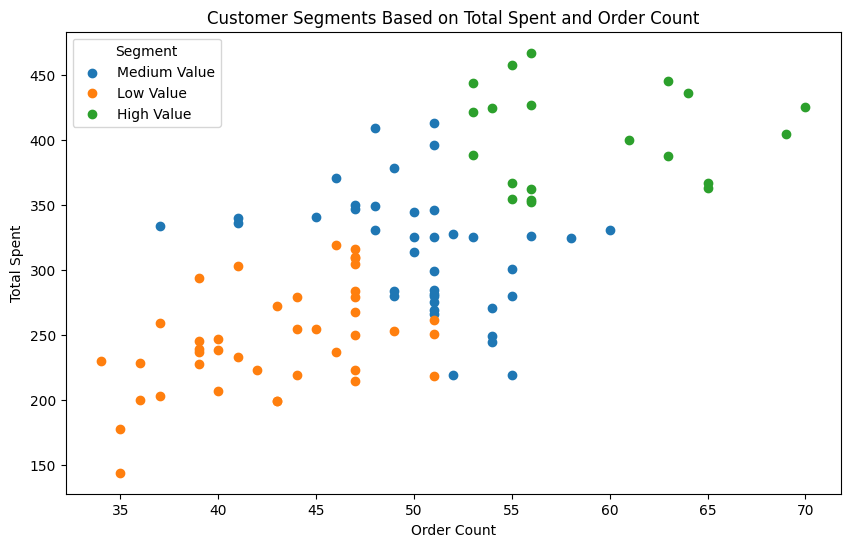

In [50]:
import matplotlib.pyplot as plt

# Define figure size constants
SCATTER_FIG_WIDTH = 10
SCATTER_FIG_HEIGHT = 6

try:
    # Scatter plot for customer segments based on TotalSpent and OrderCount
    plt.figure(figsize=(SCATTER_FIG_WIDTH, SCATTER_FIG_HEIGHT))
    # Loop through each unique segment to plot their data points
    for segment in customer_df['Segment'].unique():
        # Filter data for the current segment
        segment_data = customer_df[customer_df['Segment'] == segment]
        # Plot data points for the current segment with a label for the legend
        plt.scatter(segment_data['OrderCount'], segment_data['TotalSpent'], label=segment)
    # Add plot title, labels, and legend
    plt.title('Customer Segments Based on Total Spent and Order Count')
    plt.xlabel('Order Count')
    plt.ylabel('Total Spent')
    plt.legend(title='Segment')
    # Display the scatter plot
    plt.show()
except KeyError as e:
    logger.error("Column not found: {}", e)
except Exception as e:
    logger.exception("An unexpected error occurred: {}", e)


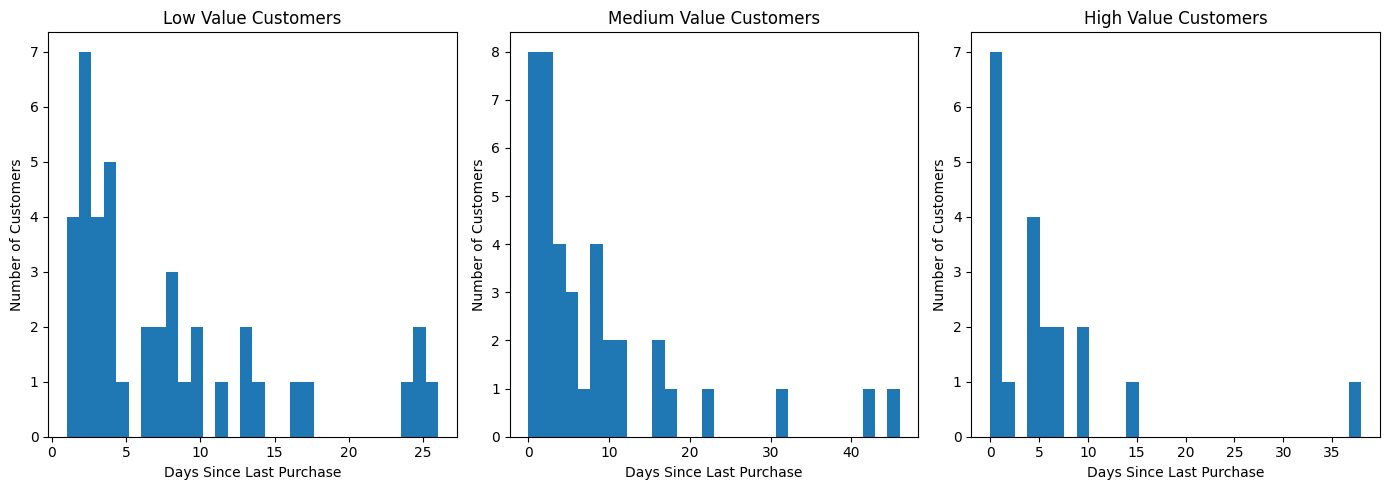

In [51]:
# Define figure size constants for consistent sizing of plots
HISTOGRAM_FIG_WIDTH = 14
HISTOGRAM_FIG_HEIGHT = 5

# Define the desired order of segments
segment_order = ['Low Value', 'Medium Value', 'High Value']

try:
    # Create histograms for each segment to show the distribution of DaysSinceLastPurchase
    plt.figure(figsize=(HISTOGRAM_FIG_WIDTH, HISTOGRAM_FIG_HEIGHT))
    # Loop through the defined order of segments to create a histogram for each
    for idx, segment in enumerate(segment_order, start=1):
        # Create a subplot for each histogram
        plt.subplot(1, len(segment_order), idx)
        # Filter data for the current segment
        segment_data = customer_df[customer_df['Segment'] == segment]
        # Create a histogram for DaysSinceLastPurchase for the current segment
        plt.hist(segment_data['DaysSinceLastPurchase'], bins=30)
        # Add title and labels to the histogram
        plt.title(f'{segment} Customers')
        plt.xlabel('Days Since Last Purchase')
        plt.ylabel('Number of Customers')
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    # Display the histograms
    plt.show()
except KeyError as e:
    # Handle missing column errors
    logger.error(f"Column not found: {e}")
except Exception as e:
    # Handle any other unexpected errors
    logger.exception(f"An unexpected error occurred: {e}")

In [52]:
# For generating insights by computing segment metrics and revenue proportion
try:
    segment_metrics = customer_df.groupby('Segment').agg({
        'TotalSpent': 'sum',
        'OrderCount': 'sum',
        'TotalItems': 'sum',
        'DaysSinceLastPurchase': 'mean',
        'AvgOrderValue': 'mean'
    }).rename(columns={
        'TotalSpent': 'Total Segment Spend',
        'OrderCount': 'Total Segment Orders',
        'TotalItems': 'Total Segment Items',
        'DaysSinceLastPurchase': 'Average Days Since Last Purchase',
        'AvgOrderValue': 'Average Order Value'
    })

    # Calculate the proportion of total revenue for each segment
    total_revenue = customer_df['TotalSpent'].sum()
    if total_revenue > 0:
        segment_metrics['Revenue Proportion'] = segment_metrics['Total Segment Spend'] / total_revenue
    else:
        logger.warning("Total revenue is zero. Cannot calculate Revenue Proportion.")
        segment_metrics['Revenue Proportion'] = None

    # Log the segment metrics
    logger.info("Segment metrics:\n{}", segment_metrics)

except KeyError as e:
    logger.error("Column not found in DataFrame: {}", e)
except Exception as e:
    logger.exception("An unexpected error occurred: {}", e)

2023-12-11 06:49:20.957 | INFO     | __main__:<cell line: 2>:26 - Segment metrics:
              Total Segment Spend  Total Segment Orders  Total Segment Items  \
Segment                                                                        
High Value            8046.120117                  1178                 3623   
Low Value            10115.360352                  1759                 5319   
Medium Value         12287.349609                  1964                 5965   

              Average Days Since Last Purchase  Average Order Value  \
Segment                                                               
High Value                            6.050000             6.885841   
Low Value                             7.756098             5.770867   
Medium Value                          8.410256             6.338979   

              Revenue Proportion  
Segment                           
High Value              0.264251  
Low Value               0.332209  
Medium Value        

**Insights**

*   Surprisingly, The `Medium Value` segment contributes the most to total revenue (40.35%), followed by 'Low Value' (33.22%) and 'High Value' (26.43%). This suggests that while 'High Value' customers may spend more individually, there are enough 'Medium Value' customers making substantial contributions to overall revenue.
*   While the `High Value` segment doesn't contribute the most to total revenue, their high average order value and frequent purchases make them a key segment for maintaining a healthy profit margin.
*   The `Low Value` segment has the lowest average order value but a significant number of total orders, which could indicate a large customer base with smaller transaction sizes.

